<a href="https://colab.research.google.com/github/rukendar/Rukendar.s/blob/main/Assignment_toyota_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

file_path = '/content/drive/MyDrive/Assignments_excelr/Toyoto_Corrola.csv'
df = pd.read_csv(file_path)
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
Model,0
Price,0
Age_08_04,0
KM,0
HP,0
Doors,0
Cylinders,0
Gears,0
Weight,0


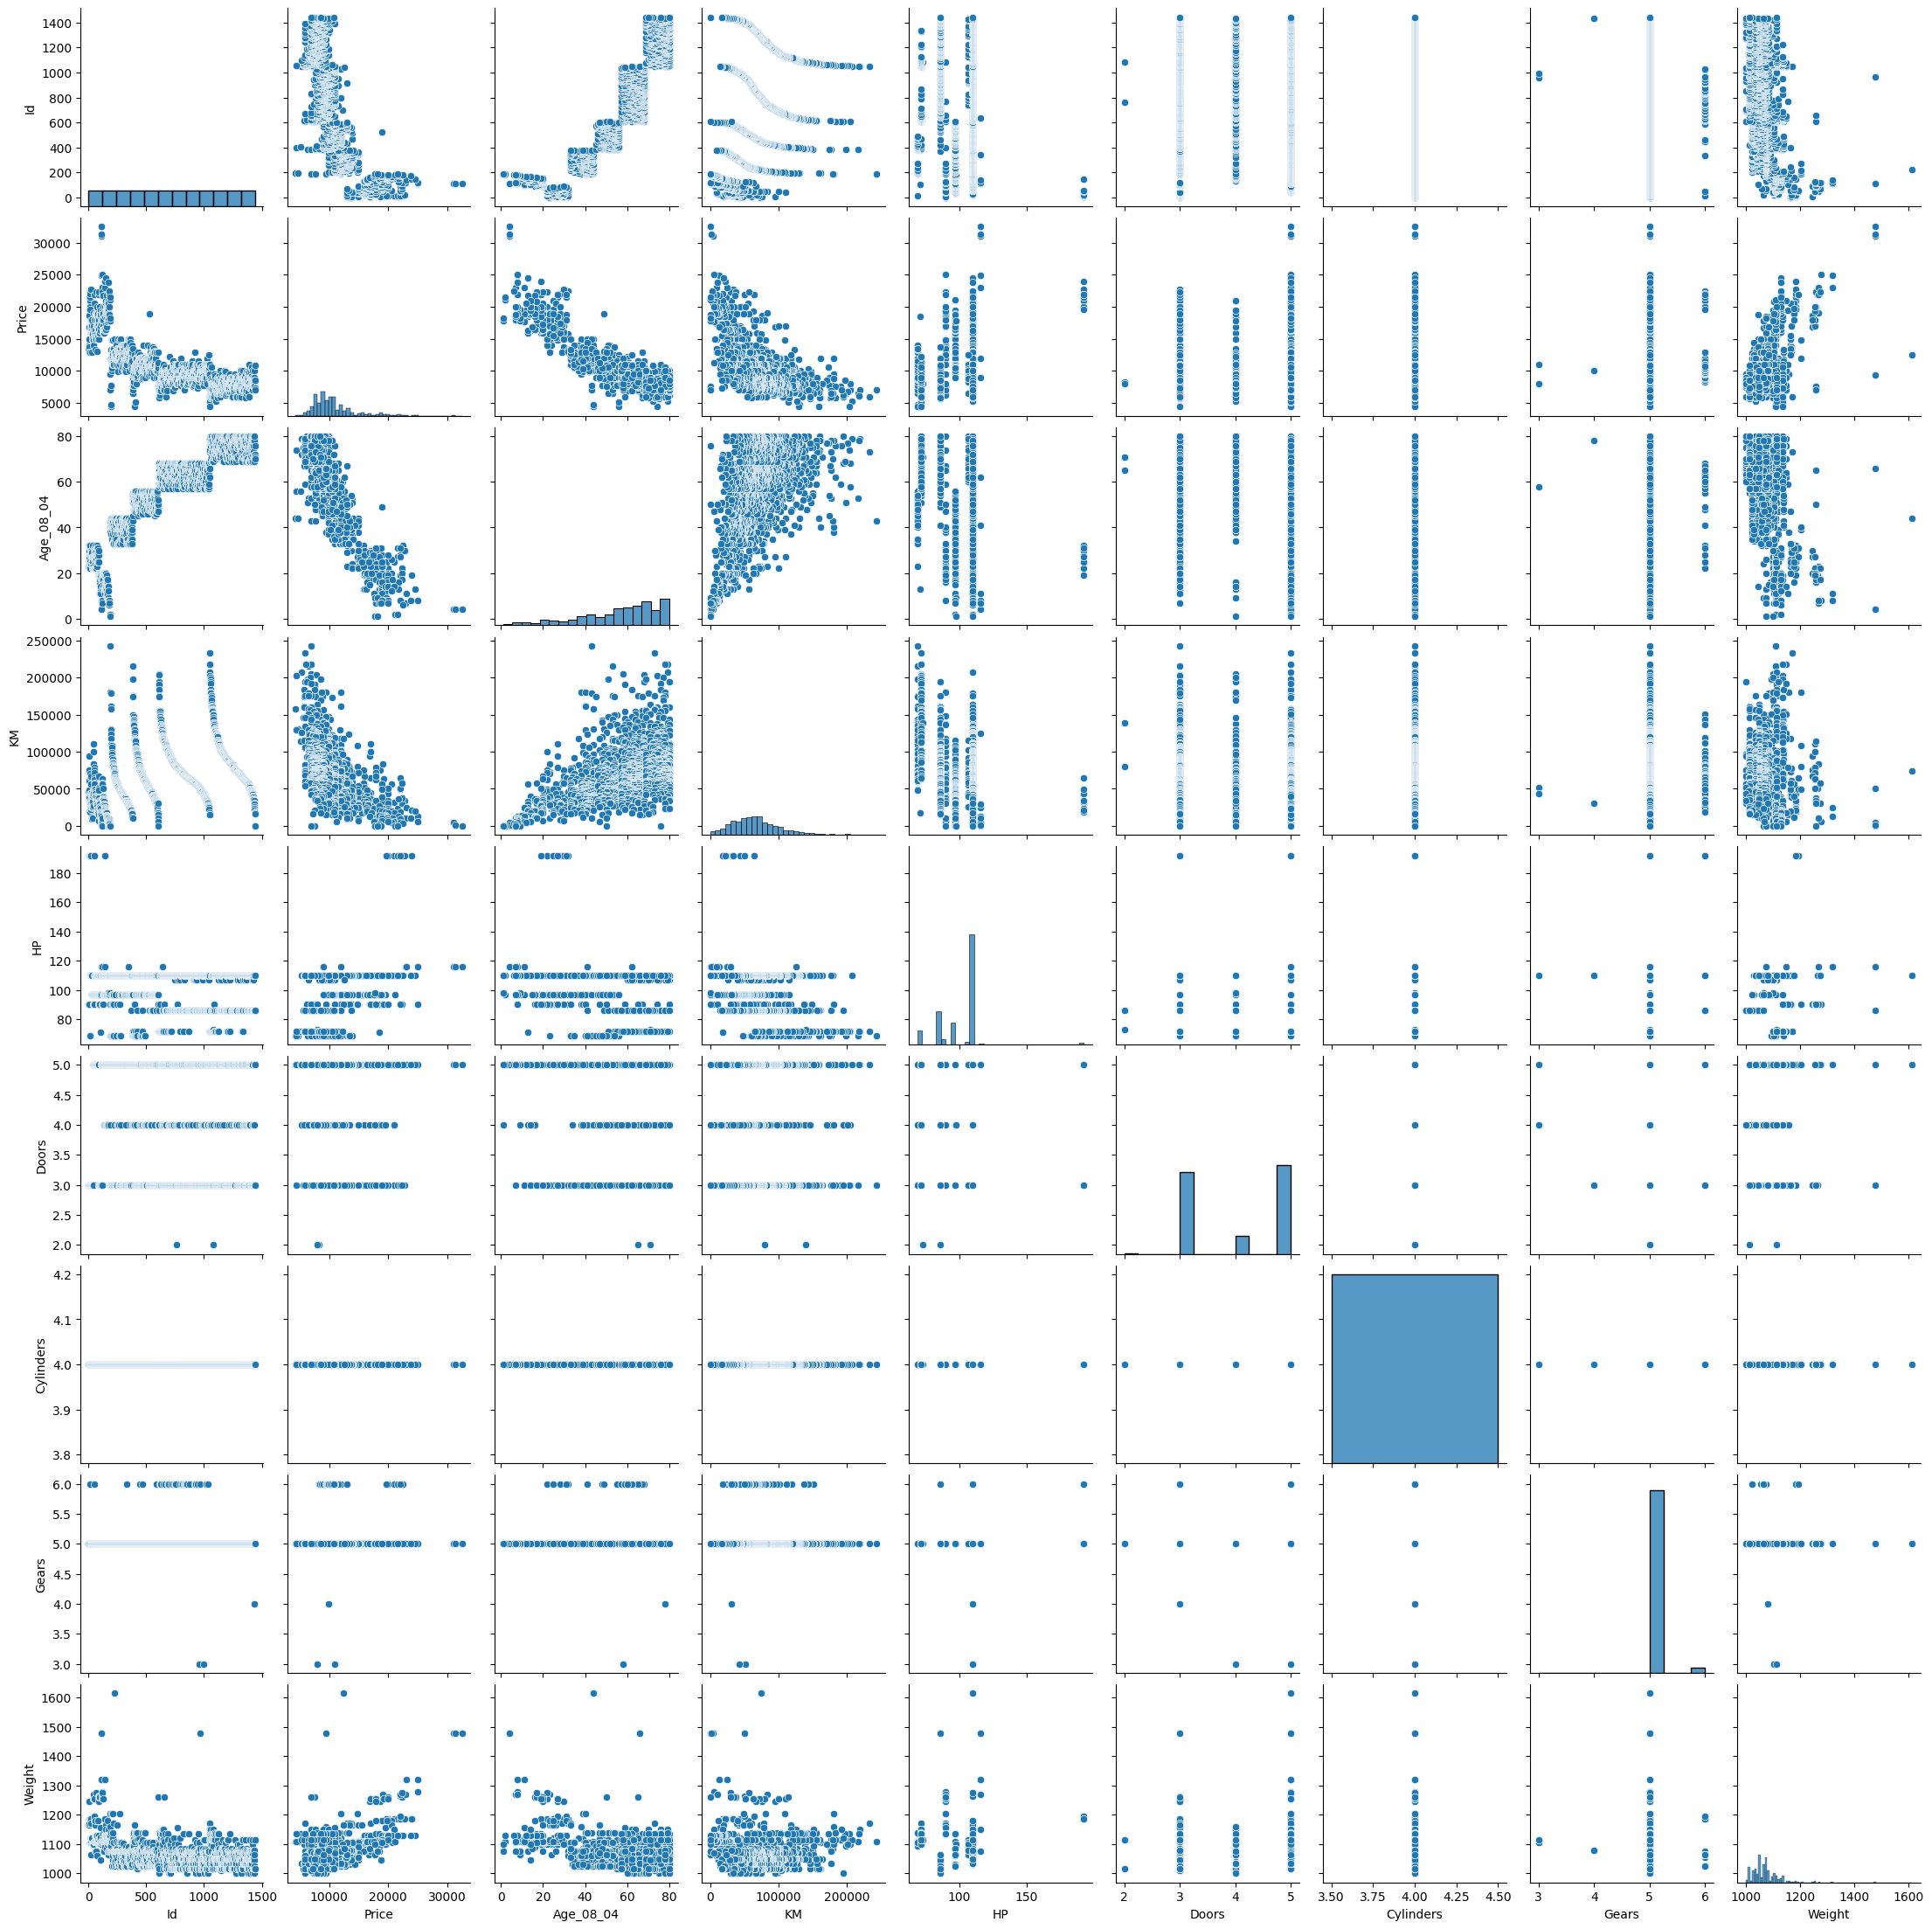

In [ ]:
sns.pairplot(df)
plt.show()

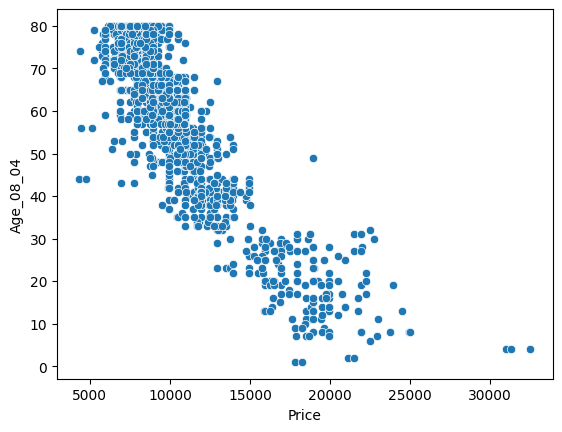

In [ ]:
sns.scatterplot(x='Price', y='Age_08_04', data=df)
plt.show()

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Age_08_04', data=df).fit()
model.params

,0
Intercept,20294.058649
Age_08_04,-170.933585


In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [ ]:
rsq_KMS = smf.ols('Price ~ KM', data=df).fit().rsquared
vif_KMS = 1/(1-rsq_KMS)
rsq_Age_08_04 = smf.ols('Price ~ Age_08_04', data=df).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04)
rsq_HP = smf.ols('Price ~ HP', data=df).fit().rsquared
vif_HP = 1/(1-rsq_HP)
print(vif_KMS, vif_Age_08_04, vif_HP)


1.48116240433134 4.317992507545384 1.1101472476907577


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Age_08_04', data=df).fit()

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                 Id     Price  Age_08_04        KM        HP     Doors  \
Id         1.000000 -0.738250   0.906132  0.273298 -0.109375 -0.130207   
Price     -0.738250  1.000000  -0.876590 -0.569960  0.314990  0.185326   
Age_08_04  0.906132 -0.876590   1.000000  0.505672 -0.156622 -0.148359   
KM         0.273298 -0.569960   0.505672  1.000000 -0.333538 -0.036197   
HP        -0.109375  0.314990  -0.156622 -0.333538  1.000000  0.092424   
Doors     -0.130207  0.185326  -0.148359 -0.036197  0.092424  1.000000   
Cylinders       NaN       NaN        NaN       NaN       NaN       NaN   
Gears     -0.043343  0.063104  -0.005364  0.015023  0.209477 -0.160141   
Weight    -0.414500  0.581198  -0.470253 -0.028598  0.089614  0.302618   

           Cylinders     Gears    Weight  
Id               NaN -0.043343 -0.414500  
Price            NaN  0.063104  0.581198  
Age_08_04        NaN -0.005364 -0.470253  
KM               NaN  0.015023 -0.028598  
HP               NaN  0.209477  0.089614  
D